<a href="https://colab.research.google.com/github/davidjjeong/multiple_linear_regression/blob/main/MLR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
! pip install seaborn watermark

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

**Practice Example 1: Ram Price Dataset**

Data Structure:

* Data: Change in Ram Price from 1957 to 2015
* Observations: 333
* Explanatory Variable: Year
* Response Variable: Price



     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


Text(0, 0.5, 'Ram Price($ per Megabyte)')

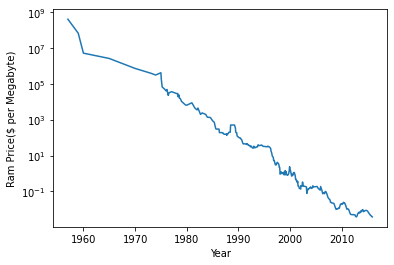

In [40]:
# Load ram_prices data
ram_prices = pd.read_csv('/content/drive/MyDrive/MLR/data/ram_price.csv')
print(ram_prices)
type(ram_prices)

# Plot the observations in the data, with log scaling on the y-axis
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Ram Price($ per Megabyte)")

Text(0, 0.5, 'Raw Ram Price')

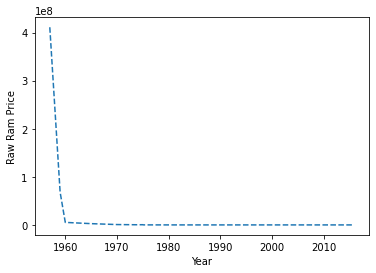

In [42]:
plt.plot(ram_prices.date, ram_prices.price, '--')
plt.xlabel("Year")
plt.ylabel("Raw Ram Price")

In [44]:
from sklearn.linear_model import LinearRegression

In [58]:
# Training: Before 2000
# Test: After 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Only use date for X variable, and slice the vector
X_train = data_train.date[:, np.newaxis]

# Change y to log scale to create a linear relationship between X and Y
y_train = np.log(data_train.price)

# Train the MLR model
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict for all periods from 1957 to 2015
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# Change from log scale to real raw price
price_lr = np.exp(pred_lr)

Text(0, 0.5, 'Ram Price in Log Scale')

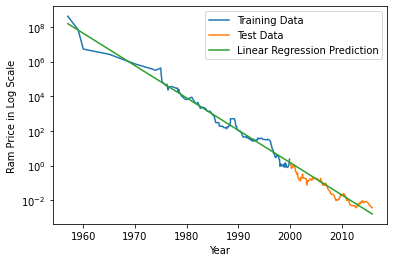

In [60]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ram Price in Log Scale")

In [63]:
# Check Linear Reg Coefficient
linear_reg.coef_
print('연도에 따른 회귀계수 (로그변환): ', linear_reg.coef_)

연도에 따른 회귀계수 (로그변환):  [-0.42880156]
